### Data Exploration and Analysis

* ***Perfomed Data Exploration on the Autism dataset to analyze columns and values in the dataset***

* ***Inferred necessary preprocessing steps to be implemented in pre-processing phase. Pre-prcoessing steps are implemented in `modelPreprocess.py` script***

***

In [1]:
#imported required libraries
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import os
    
except ModuleNotFoundError as err:
    print('Package/Module not found in dataExploration.py file' )

%matplotlib inline

In [2]:
# Function to load dataset into dataframe

def load_data(filename):
    try:
        #full_path = os.path.join(path, filename)
        return pd.read_csv(filename)
    
    except FileNotFoundError as err:
        print('Input data file is not found in dataExploration.py file')
        print(err)
        
    except:
        print('Isse when loading input CSV data in dataExploration.py file')      


df_train = load_data('train.csv')

**Predict whether a person has autism or not; using other dependent variables (Features)**


* `ID` - ID of the patient
* `A1_Score to A10_Score` - Score based on Autism Spectrum Quotient (AQ) 10 item screening tool
* `age` - Age of the patient in years
* `gender` - Gender of the patient
* `ethnicity` - Ethnicity of the patient
* `jaundice` - Whether the patient had jaundice at the time of birth
* `autism` - Whether an immediate family member has been diagnosed with autism
* `contry_of_res` - Country of residence of the patient
* `used_app_before` - Whether the patient has undergone a screening test before
* `result` - Score for AQ1-10 screening test
* `age_desc` - Age of the patient
* `relation` - Relation of patient who completed the test
* `Class/ASD` - Classified result as 0 or 1. Here 0 represents No and 1 represents Yes. This is the target column

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [4]:
df_train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


<AxesSubplot:>

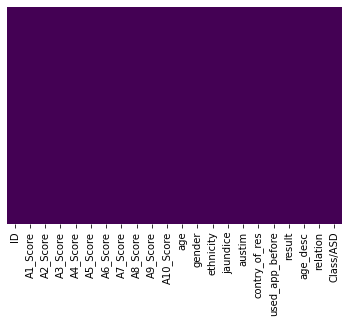

In [5]:
sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis', yticklabels=False)

**Above heatmap, does not contains any strips with different color which show that columns does not contain any NaN values. But we still need to tackle for uknown values.**

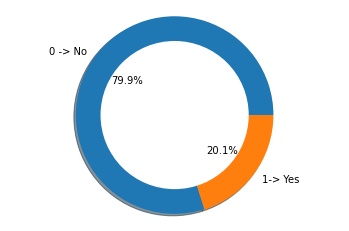

Total number of class "0" in the dataset : 639
Total number of class "1" in the dataset : 161


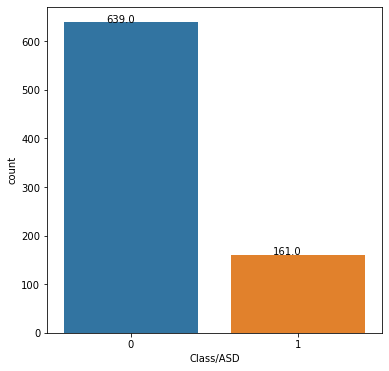

In [6]:
def dist_target_class(col):
    '''
    This function checks distribution of classes in the target column.
    '''
    
    plt.pie(col.value_counts(), labels=['0 -> No','1-> Yes'], autopct='%1.1f%%', shadow=True)

    #draw a circle at the center of pie to make it look like a donut
    centre_circle = plt.Circle((0,0),0.75,facecolor='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)


    # Set aspect ratio to be equal so that pie is drawn as a circle.
    plt.axis('equal')
    plt.show()
    
    cls = df_train['Class/ASD'].value_counts()
    print('Total number of class "0" in the dataset :',cls[0])
    print('Total number of class "1" in the dataset :',cls[1])
    
    plt.figure(figsize=(6,6))
    ax = sns.countplot(x=col.name, data = df_train)
    for p in ax.patches:
       ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

dist_target_class(df_train['Class/ASD'])

**⬆️ It can be noticed from the above chart that, almost 80% instances are of label 0 [Autism = No] and 20% instances in the dataset are label 1 [Autism = Yes].**  *This shows imbalanced dataset*

Total number of MALE in the dataset:  530
Total number of FEMALE in the dataset:  270


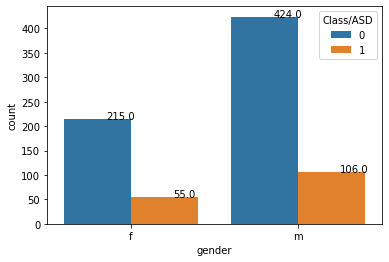

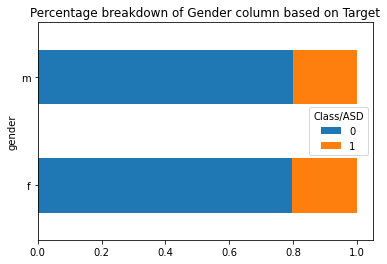

In [7]:
def dist_gender(col):
    
    cls = col.value_counts() 
    print('Total number of MALE in the dataset: ', cls[0])
    print('Total number of FEMALE in the dataset: ', cls[1])

    ax = sns.countplot(x=col.name, data=df_train, hue='Class/ASD')

    for p in ax.patches:
       ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    
    df_train.groupby(col.name)['Class/ASD'].value_counts(normalize= True).unstack().plot.barh(stacked = True)
    plt.title('Percentage breakdown of Gender column based on Target')
    

    
dist_gender(df_train['gender'])

**⬆️Instances in the dataset has Total 270 females and 530 males From the above bar chart, it can be inferred that 20 % of total female has Autism and 20 % total male has Autism.**

In [8]:
print('Unique categories in categorical columns : -')
for col in df_train.columns:
    print(col,':')
    n = df_train[col].nunique()
    
    if n < 25:
        print(df_train[col].unique())

Unique categories in categorical columns : -
ID :
A1_Score :
[1 0]
A2_Score :
[0 1]
A3_Score :
[1 0]
A4_Score :
[0 1]
A5_Score :
[1 0]
A6_Score :
[0 1]
A7_Score :
[1 0]
A8_Score :
[0 1]
A9_Score :
[1 0]
A10_Score :
[1 0]
age :
gender :
['f' 'm']
ethnicity :
['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
jaundice :
['no' 'yes']
austim :
['no' 'yes']
contry_of_res :
used_app_before :
['no' 'yes']
result :
age_desc :
['18 and more']
relation :
['Self' 'Relative' 'Parent' '?' 'Others' 'Health care professional']
Class/ASD :
[0 1]


In [9]:
# 'age_desc' column has only one value - ['18 and more']
# 'ID' column has all unique values and acting like an index. Hence, it can be removed

df_train.drop(['age_desc','ID'], axis=1, inplace= True)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


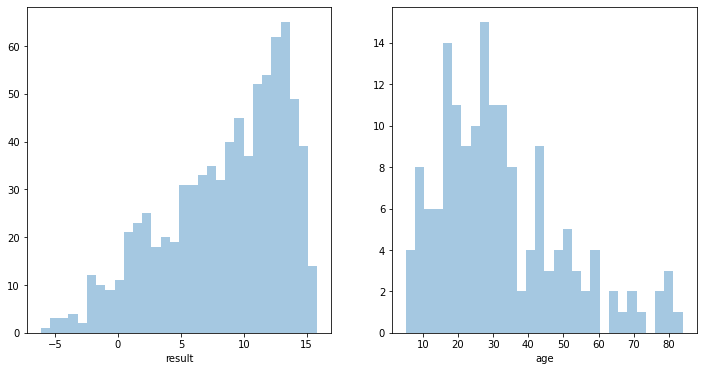

In [10]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
sns.distplot(df_train['result'], ax= axes[0],bins=30, kde=False)
sns.distplot(df_train[df_train['Class/ASD'] == 1]['age'], ax= axes[1],bins=30, kde=False)
plt.show()

* Two histograms above shows frequency of values in two continuous columns - 'result' and 'age'.
* Histogram on right shows frquency of ages of people that has Autism. it shows that people with age 25-35 has highest number of Autism.

* Histogram on left shows, what values of Result column has high chances of Autism. it shows, when the result value is between 11-14, the chances of having autism is higher.

* Result - Score for AQ1-10 Screening test

<AxesSubplot:xlabel='age', ylabel='result'>

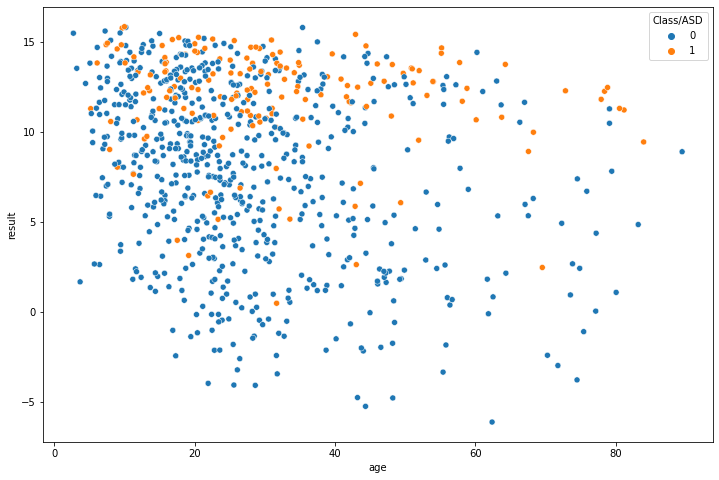

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='age',y='result', data=df_train, hue='Class/ASD')

<AxesSubplot:>

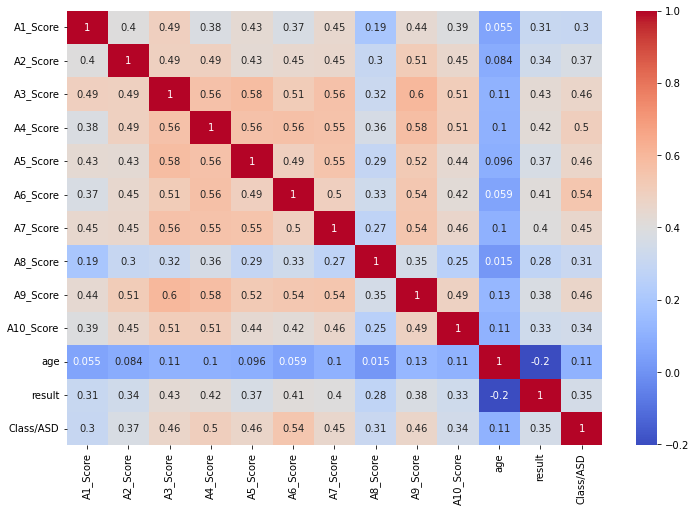

In [12]:
plt.figure(figsize=(12,8))

sns.heatmap(df_train.corr(), annot= True, cmap='coolwarm')

Above heatmap, show correlation of among columns. correlation values are between -1 to 1.

* Value near to 1 = higher positive correlation between both columns
* Value near to -1 = high negative correlation between both columns
* value near to 0 = less correlation between both columns

In [13]:
df_train.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


### Summary of Analysis

1) Two continuous columns in the dataset ==> *age and result* 
    
    * Steps - 1) Check and Handle outliers 2) Scaling

2) Two categorical columns has unkown value ==> *ehtnicity and relation*
    
    * Steps - 1) Handle unknown values
    
3) Several alphabatical columns in the dataset
    
    * Steps - 1) Apply encoding to convert them into numeric format (OneHotEncoding or OrdinalEncoding)
    
4) Few columns are not important for particular reasons ==> *ID and age_desc*

    * Steps - 1) Drop these columns
    
**NOTE:** These Preprocessing steps are implemented in `dataPreprocess.ipnyb` file
